# 1. Create a friend network that satisfies the following requirements:
+ This is a weighted graph.
+ Each friend is a node.
+ The edge between two nodes is the distance between their homes.
+ Your friends can be connected.
+ The graph contains at least 22 people.
+ Add the edge to show a relationship between friends. Example: best friend, couple, married, etc...
+ Visualize your graph using spring and circular layouts.

** Following the sample graph in practice, you can create a sample friend network (do not need to be a real network).


In [1]:
!pip install networkx pandas numpy matplotlib scipy

In [2]:
import networkx as nx
import numpy as np
from random import sample
import matplotlib.pyplot as plt

In [3]:
edges = [
        ("Enma", "Ana",  74), 
        ("Enma", "Lyly",  525), 
        ("Ana", "Robert",  962), 
        ("Ana", "Nico",  283), 
        ("Bin", "Mono",  39), 
        ("Bin", "Mie",  364), 
        ("Mono", "Nico",  727), 
        ("Mono", "Tino",  664), 
        ("Nico", "Tino",  724), 
        ("Nico", "Jack",  457), 
        ("Nico", "Brock",  870), 
        ("Nico", "Robert",  602), 
        ("Jack", "Elsa",  510), 
        ("Jack", "Jan",  956), 
        ("Elsa", "Nick",  780), 
        ("Elsa", "Mark",  378), 
        ("Tino", "Mie",  321), 
        ("Tino", "Jin",  341), 
        ("Tino", "Tim",  83), 
        ("Hiro", "Mie",  154), 
        ("Hiro", "Brock",  959), 
        ("Hiro", "Jan",  396), 
        ("Mie", "Jan",  228), 
        ("Robert", "Brock",  727), 
        ("Jin", "Brock",  247), 
        ("Brock", "Kevin",  918), 
        ("Hana", "Mark",  18), 
        ("Hana", "Tim",  765), 
        ("Mark", "Lyly",  363),
        ("Harry", "Alice", 895),
        ("Harry", "Elsa", 340),
        ("Alice", "Elsa", 155),
        ("Harry", "Hiro", 211)
]


graph = nx.Graph()
graph.add_weighted_edges_from(edges)

In [4]:
# draw edge labels
edge_labels = {
        ("Nico","Jack"): 'Best friend', 
        ("Tino","Mie"): 'Couple',
        ("Hana","Mark"): 'Couple',
        ("Ana","Robert"): 'Married',
    }

{('Nico',
  'Jack'): Text(0.013713086001920427, 0.0302788237738085, 'Best friend'),
 ('Tino', 'Mie'): Text(0.41113340158604156, 0.1524995113677617, 'Couple'),
 ('Hana', 'Mark'): Text(0.2524112248395689, -0.13178901617829547, 'Couple'),
 ('Ana', 'Robert'): Text(-0.29561208264383837, 0.3016836773233529, 'Married')}

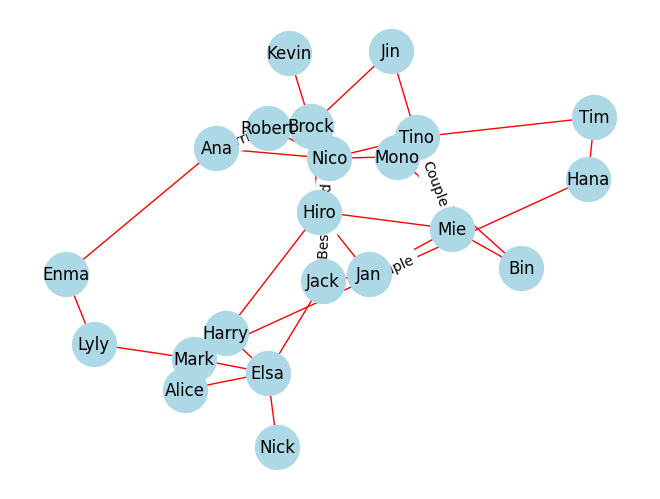

In [5]:
options = {
    'node_color': "lightblue",       # color of node
    'node_size': 1000,          # size of node
    'width': 1,                 # line width of edges
    'arrowsize': 18,            # size of arrow
    'edge_color':'red',         # edge color
}

# Spring layout
pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels = True, arrows=True, **options)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

{('Nico',
  'Jack'): Text(-0.2129192170421665, 0.7251363755398836, 'Best friend'),
 ('Tino', 'Mie'): Text(-0.5351378429067735, 0.832690840780789, 'Couple'),
 ('Hana', 'Mark'): Text(2.7093020049662186e-09, -0.7557495731590542, 'Couple'),
 ('Ana', 'Robert'): Text(0.8071768587091379, 0.5187410778565019, 'Married')}

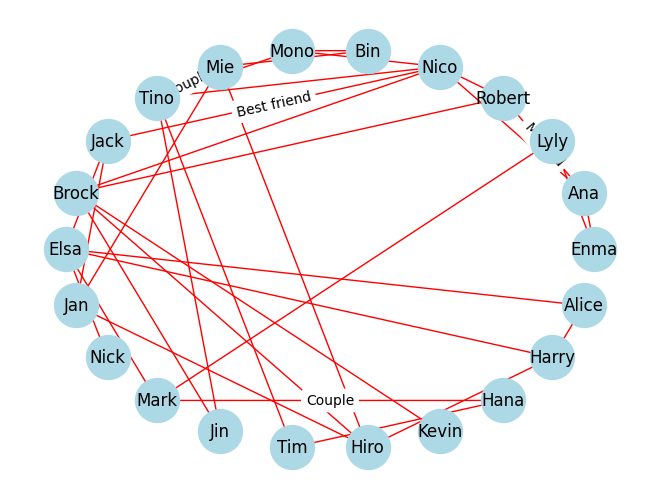

In [6]:
# set circular layout
pos = nx.circular_layout(graph)

nx.draw(graph, pos, with_labels = True, arrows=True, **options)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# 2. Draw Betweenness Centrality in a graph:
+ Load CE_PG graph from the file: [data/CE-PG.txt](https://github.com/NSLab-CUK/Graph-Mining-Spring-2024/tree/main/W3/data/CE-PG.txt) in the class github.
+ Draw betweenness centrality in the graph with 2 types of layouts: Spring layout and Circular layout.
+ Save the figures of each layout.

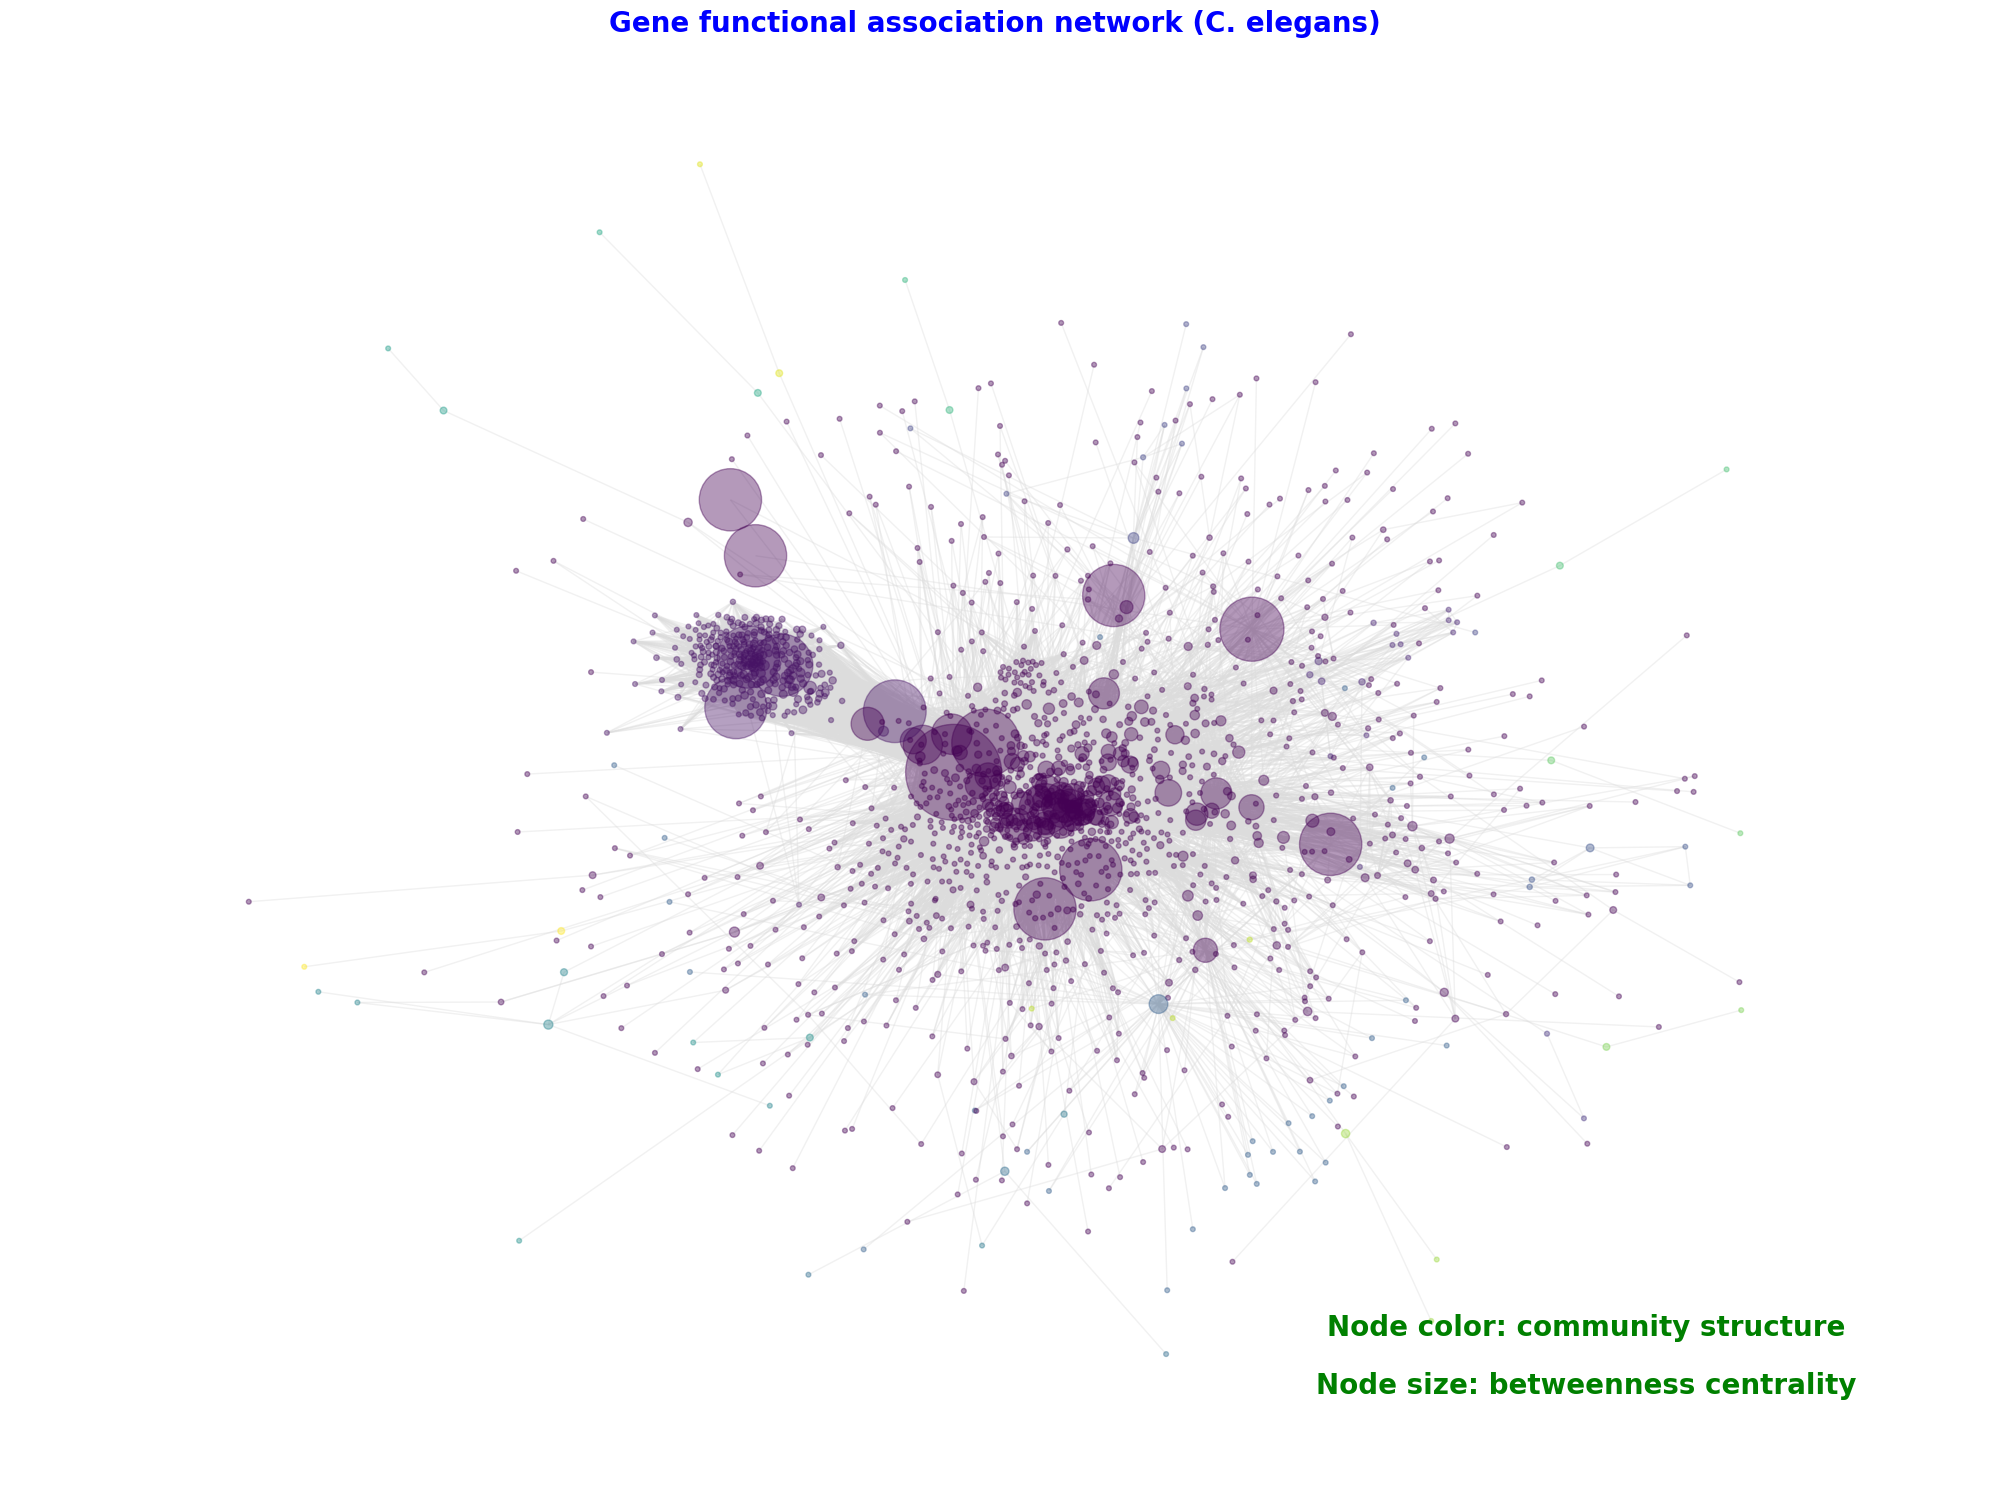

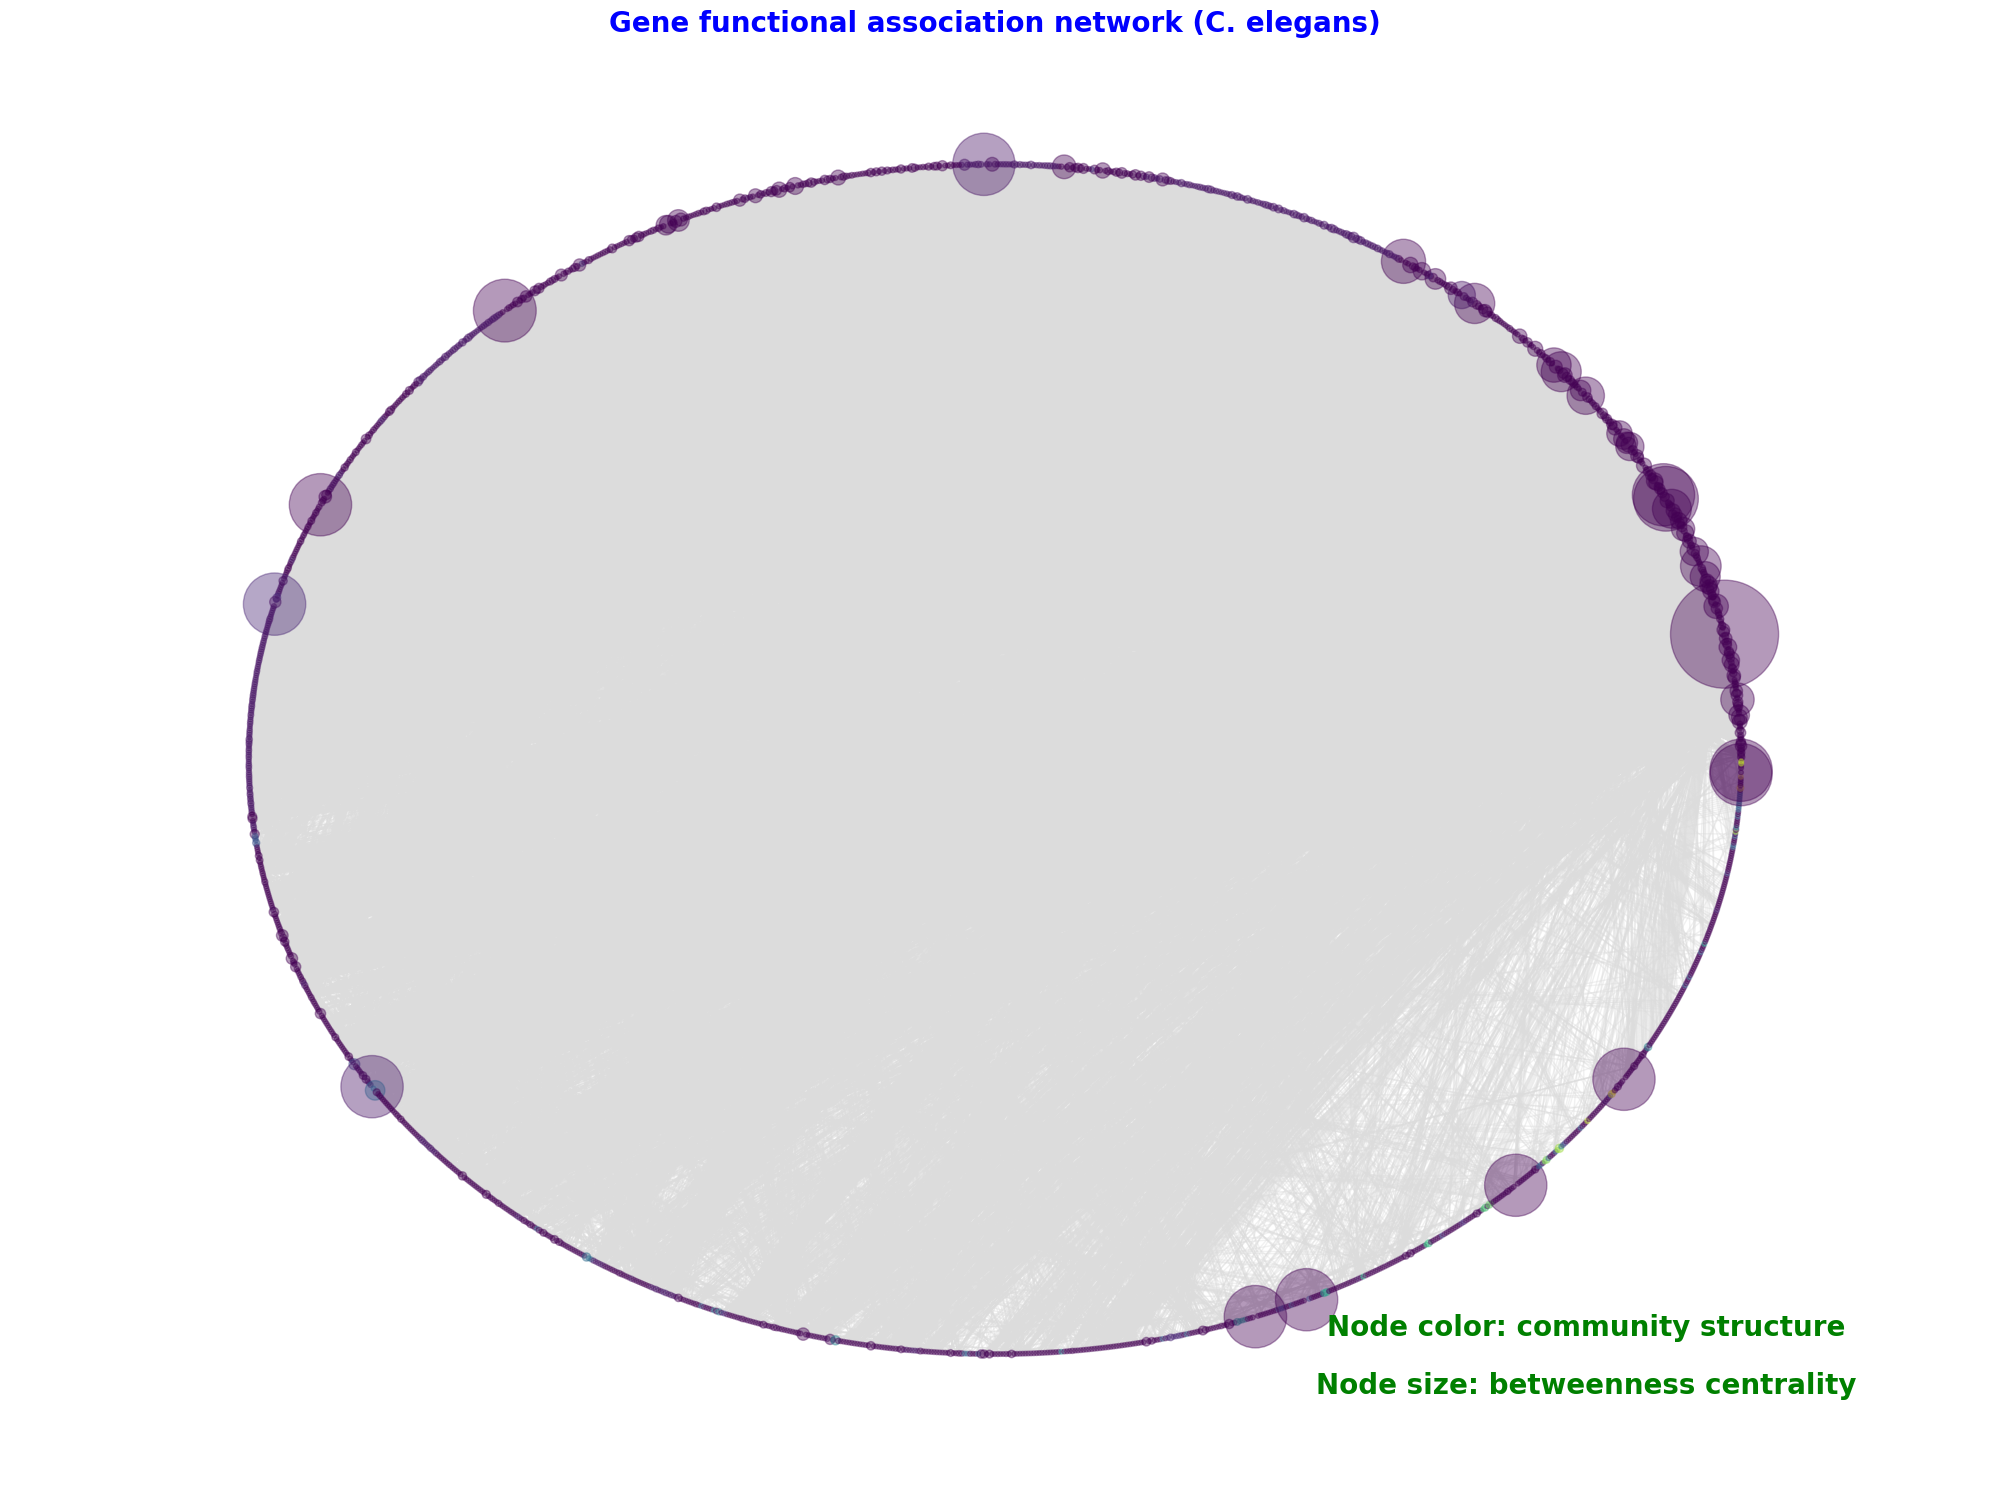

In [7]:
# largest connected component
def get_largest_component(G):
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    largest_subgraph = G.subgraph(largest_component)
    
    return largest_subgraph

def draw_graph_betweenness_centrality(G, largest_component, pos):
    # Calculate betweenness centrality
    centrality = nx.betweenness_centrality(largest_component, k=10, endpoints=True)

    # Compute community structure
    lpc = nx.community.label_propagation_communities(largest_component)
    community_index = {n: i for i, com in enumerate(lpc) for n in com}

    # Draw graph using matplotlib
    fig, ax = plt.subplots(figsize=(20, 15))
    node_color = [community_index[n] for n in largest_component]
    node_size = [v * 20000 for v in centrality.values()]
    nx.draw_networkx(
        largest_component,
        pos=pos,
        with_labels=False,
        node_color=node_color,
        node_size=node_size,
        edge_color="gainsboro",
        alpha=0.4,
    )

    # Title/legend
    font = {"color": "blue", "fontweight": "bold", "fontsize": 20}
    ax.set_title("Gene functional association network (C. elegans)", font)
    # Change font color for legend
    font["color"] = "green"

    ax.text(
        0.80,
        0.10,
        "Node color: community structure",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )
    ax.text(
        0.80,
        0.06,
        "Node size: betweenness centrality",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )

    # Resize figure for label readability
    ax.margins(0.1, 0.05)
    fig.tight_layout()
    plt.axis("off")
    plt.show()
    
# Read graph data from edgelist
G = nx.read_weighted_edgelist("data/CE-PG.txt")

# Spring layout
largest_component = get_largest_component(G)
pos = nx.spring_layout(largest_component, k=0.15)
draw_graph_betweenness_centrality(G, largest_component, pos)

# Circular layout
pos = nx.circular_layout(largest_component)
draw_graph_betweenness_centrality(G, largest_component, pos)

# 3. Analyze and visualize in a graph:
+ Load CE_PG graph from the file: [data/CE-PG.txt](https://github.com/NSLab-CUK/Graph-Mining-Spring-2024/tree/main/W3/data/CE-PG.txt) in the class github.
+ Consider those methods to analyze and remove unimportant nodes: random, degree, closeness, katz, pagerank, eigenvector.
+ Draw betweenness centrality in the graph and save the figures of each good visualization. (for example: a good visualization is what we can see a clear structure of the graph, the relationship among important nodes, and so on).

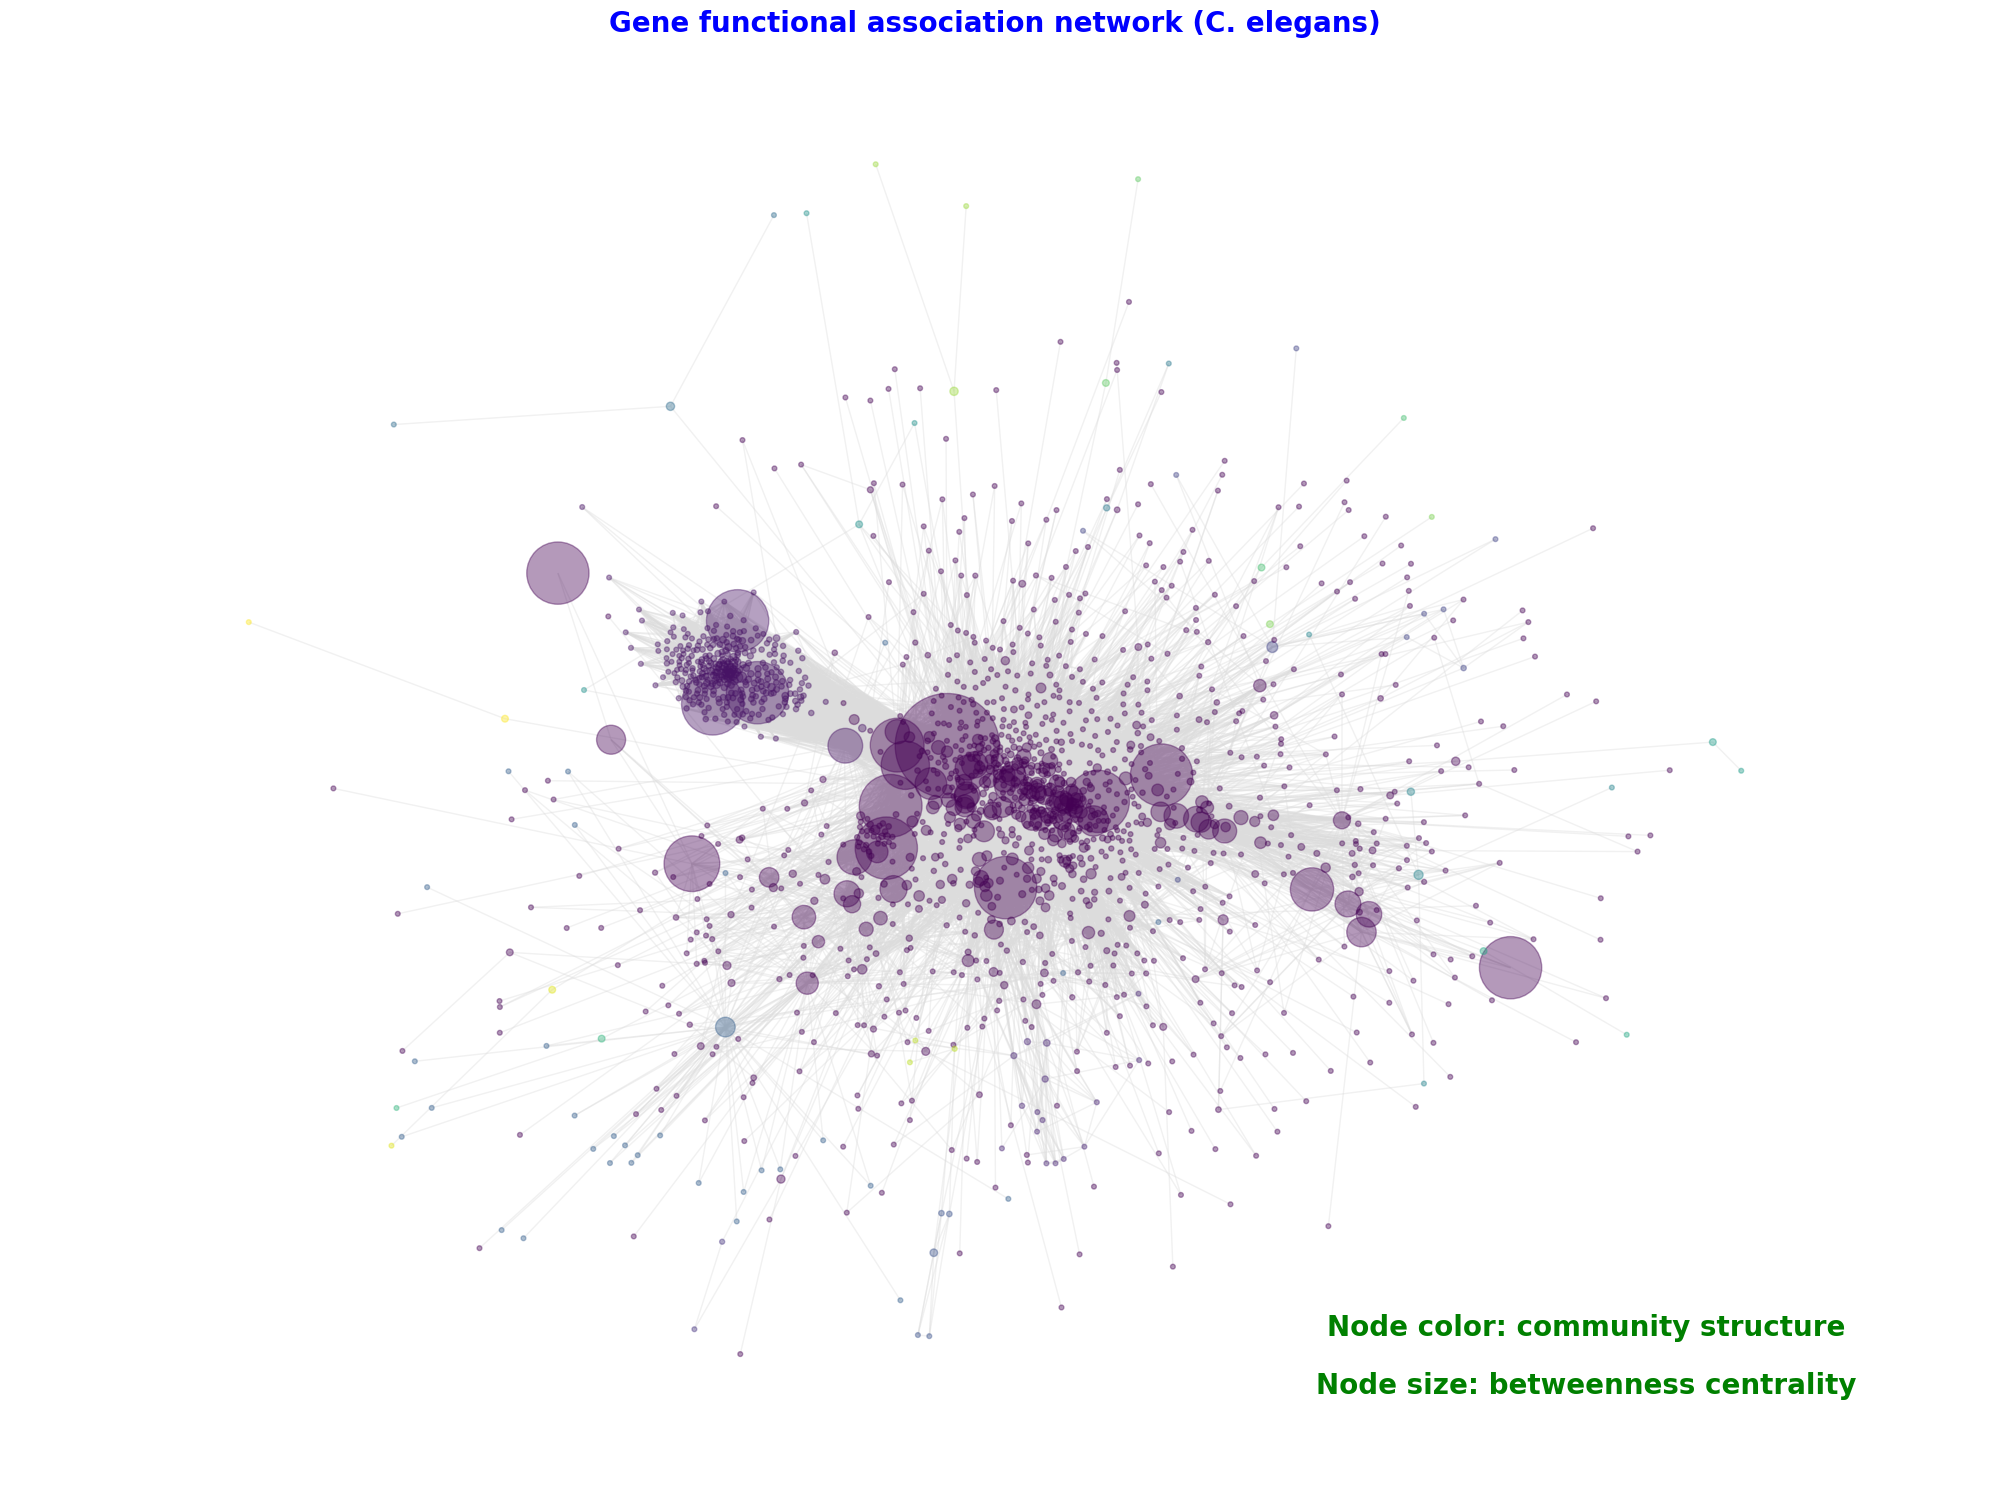

In [52]:
# largest connected component
def get_largest_component(G):
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    largest_subgraph = G.subgraph(largest_component)
    
    return largest_subgraph

def draw_graph_betweenness_centrality(G, largest_component, k, pos):
    # Calculate betweenness centrality
    centrality = nx.betweenness_centrality(largest_component, k = k, endpoints=True)

    # Compute community structure
    lpc = nx.community.label_propagation_communities(largest_component)
    community_index = {n: i for i, com in enumerate(lpc) for n in com}

    # Draw graph using matplotlib
    fig, ax = plt.subplots(figsize=(20, 15))
    node_color = [community_index[n] for n in largest_component]
    node_size = [v * 20000 for v in centrality.values()]
    nx.draw_networkx(
        largest_component,
        pos=pos,
        with_labels=False,
        node_color=node_color,
        node_size=node_size,
        edge_color="gainsboro",
        alpha=0.4,
    )

    # Title/legend
    font = {"color": "blue", "fontweight": "bold", "fontsize": 20}
    ax.set_title("Gene functional association network (C. elegans)", font)
    # Change font color for legend
    font["color"] = "green"

    ax.text(
        0.80,
        0.10,
        "Node color: community structure",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )
    ax.text(
        0.80,
        0.06,
        "Node size: betweenness centrality",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )

    # Resize figure for label readability
    ax.margins(0.1, 0.05)
    fig.tight_layout()
    plt.axis("off")
    plt.show()
    
# Read graph data from edgelist
G = nx.read_weighted_edgelist("data/CE-PG.txt")

# Spring layout
largest_component = get_largest_component(G)
pos = nx.spring_layout(largest_component, k=0.15)
draw_graph_betweenness_centrality(G, largest_component, 10, pos)

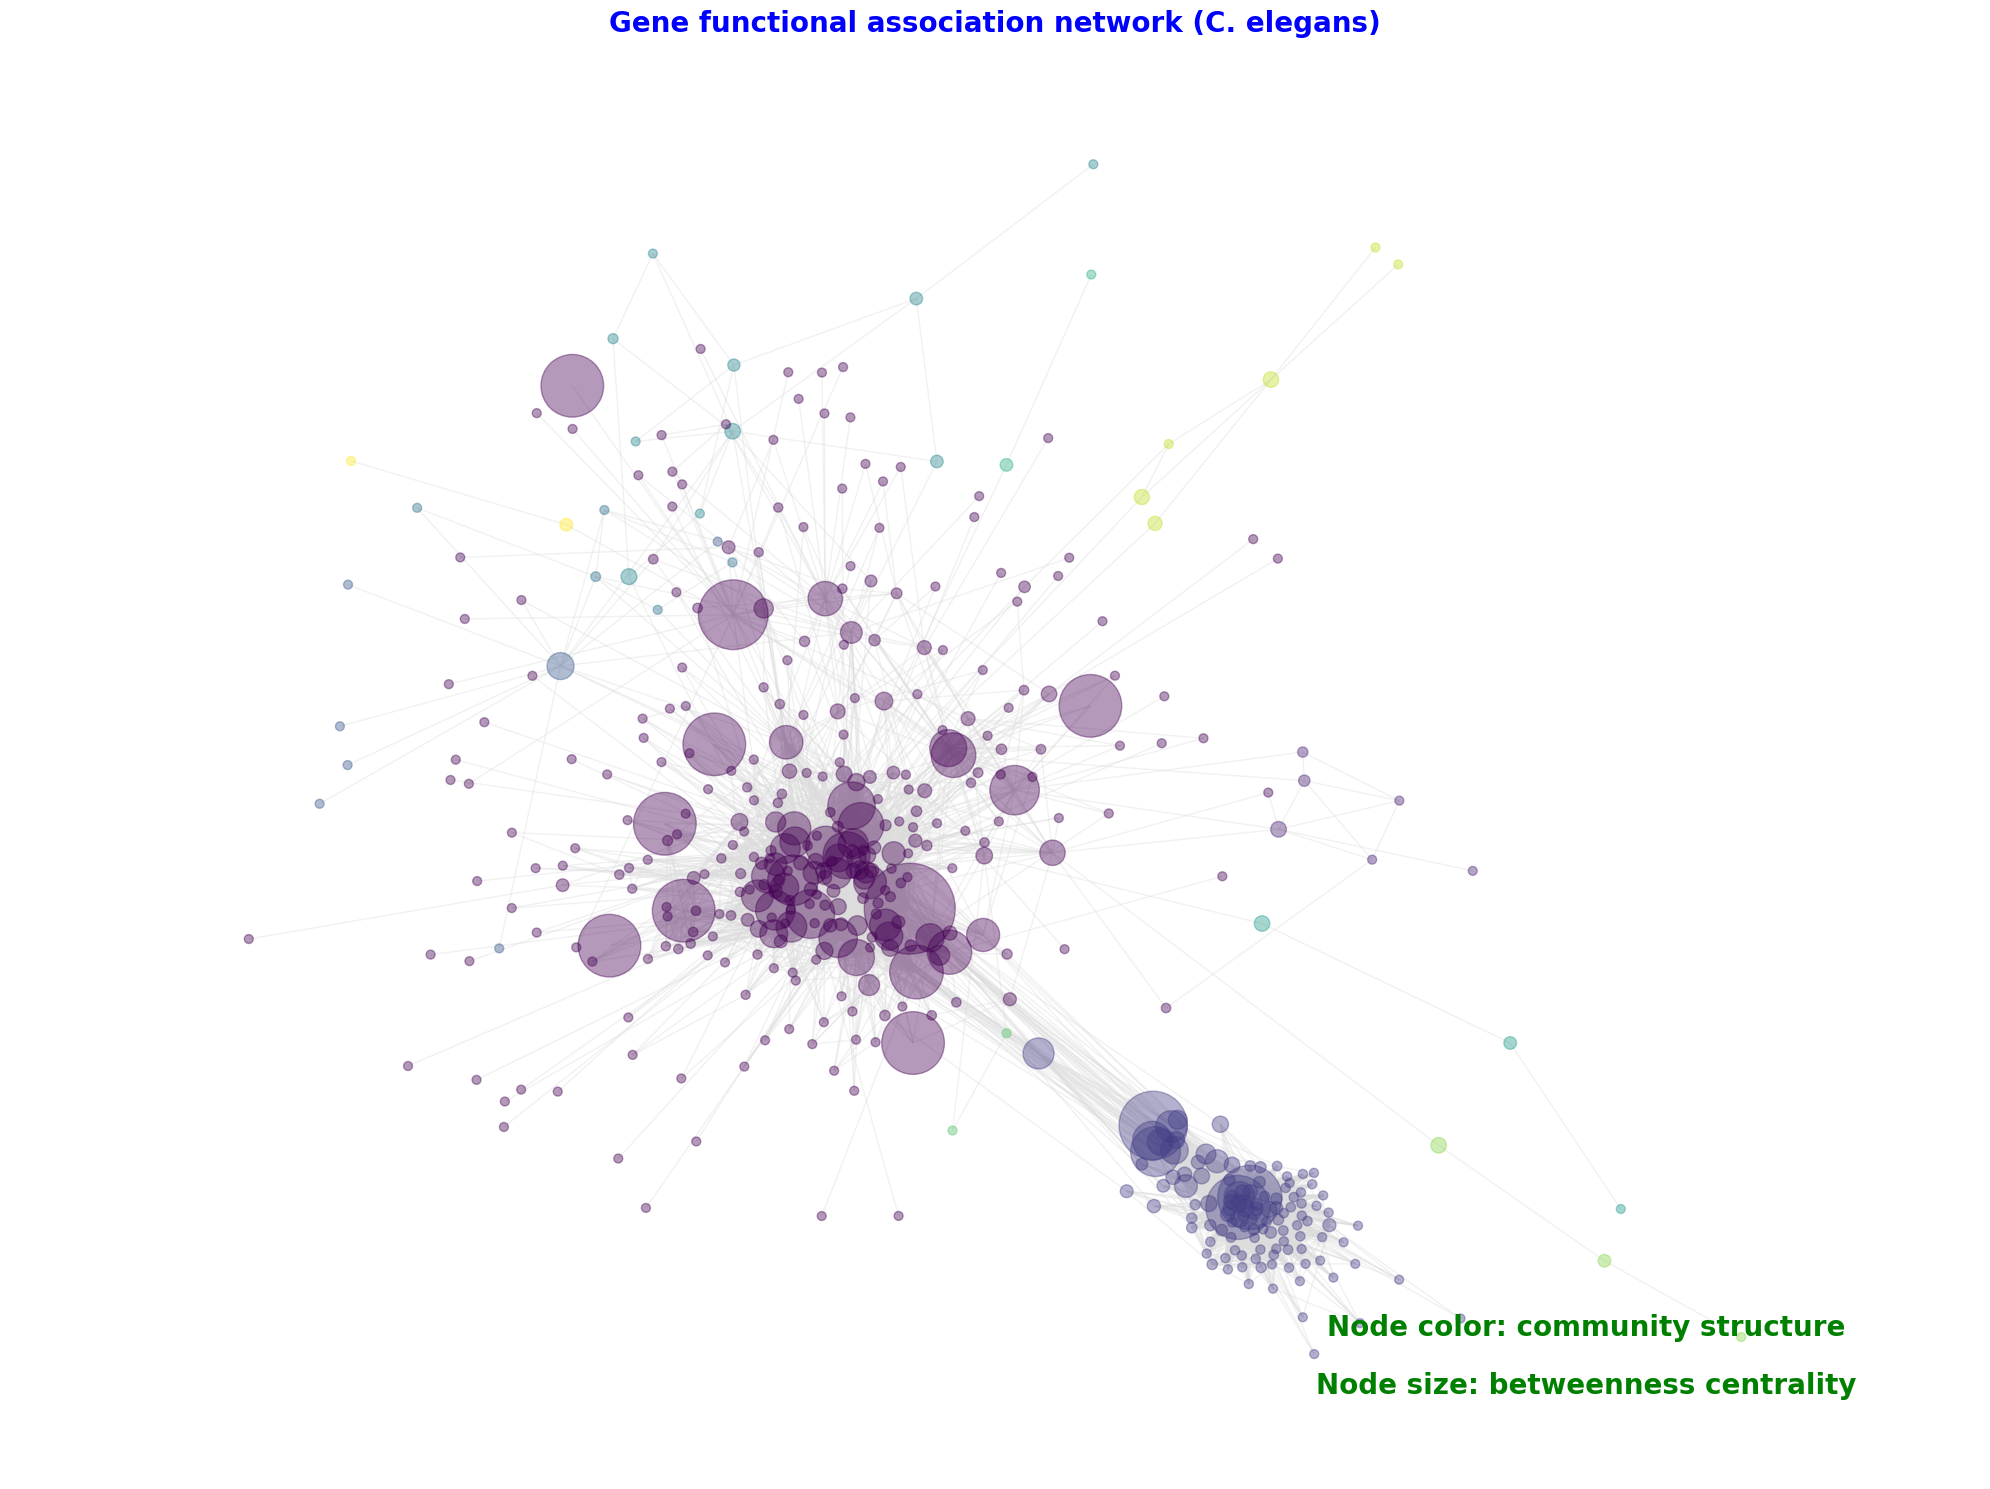

In [53]:
# Remove randomly selected nodes (to make example fast)
def remove_random_selected_nodes(G):
    num_to_remove = int(len(G) / 1.5)
    nodes = sample(list(G.nodes), num_to_remove)
    G.remove_nodes_from(nodes)
    return G

G1 = remove_random_selected_nodes(G)
largest_component = get_largest_component(G)
pos = nx.spring_layout(largest_component, k=0.15)
draw_graph_betweenness_centrality(G1, largest_component, 10, pos)

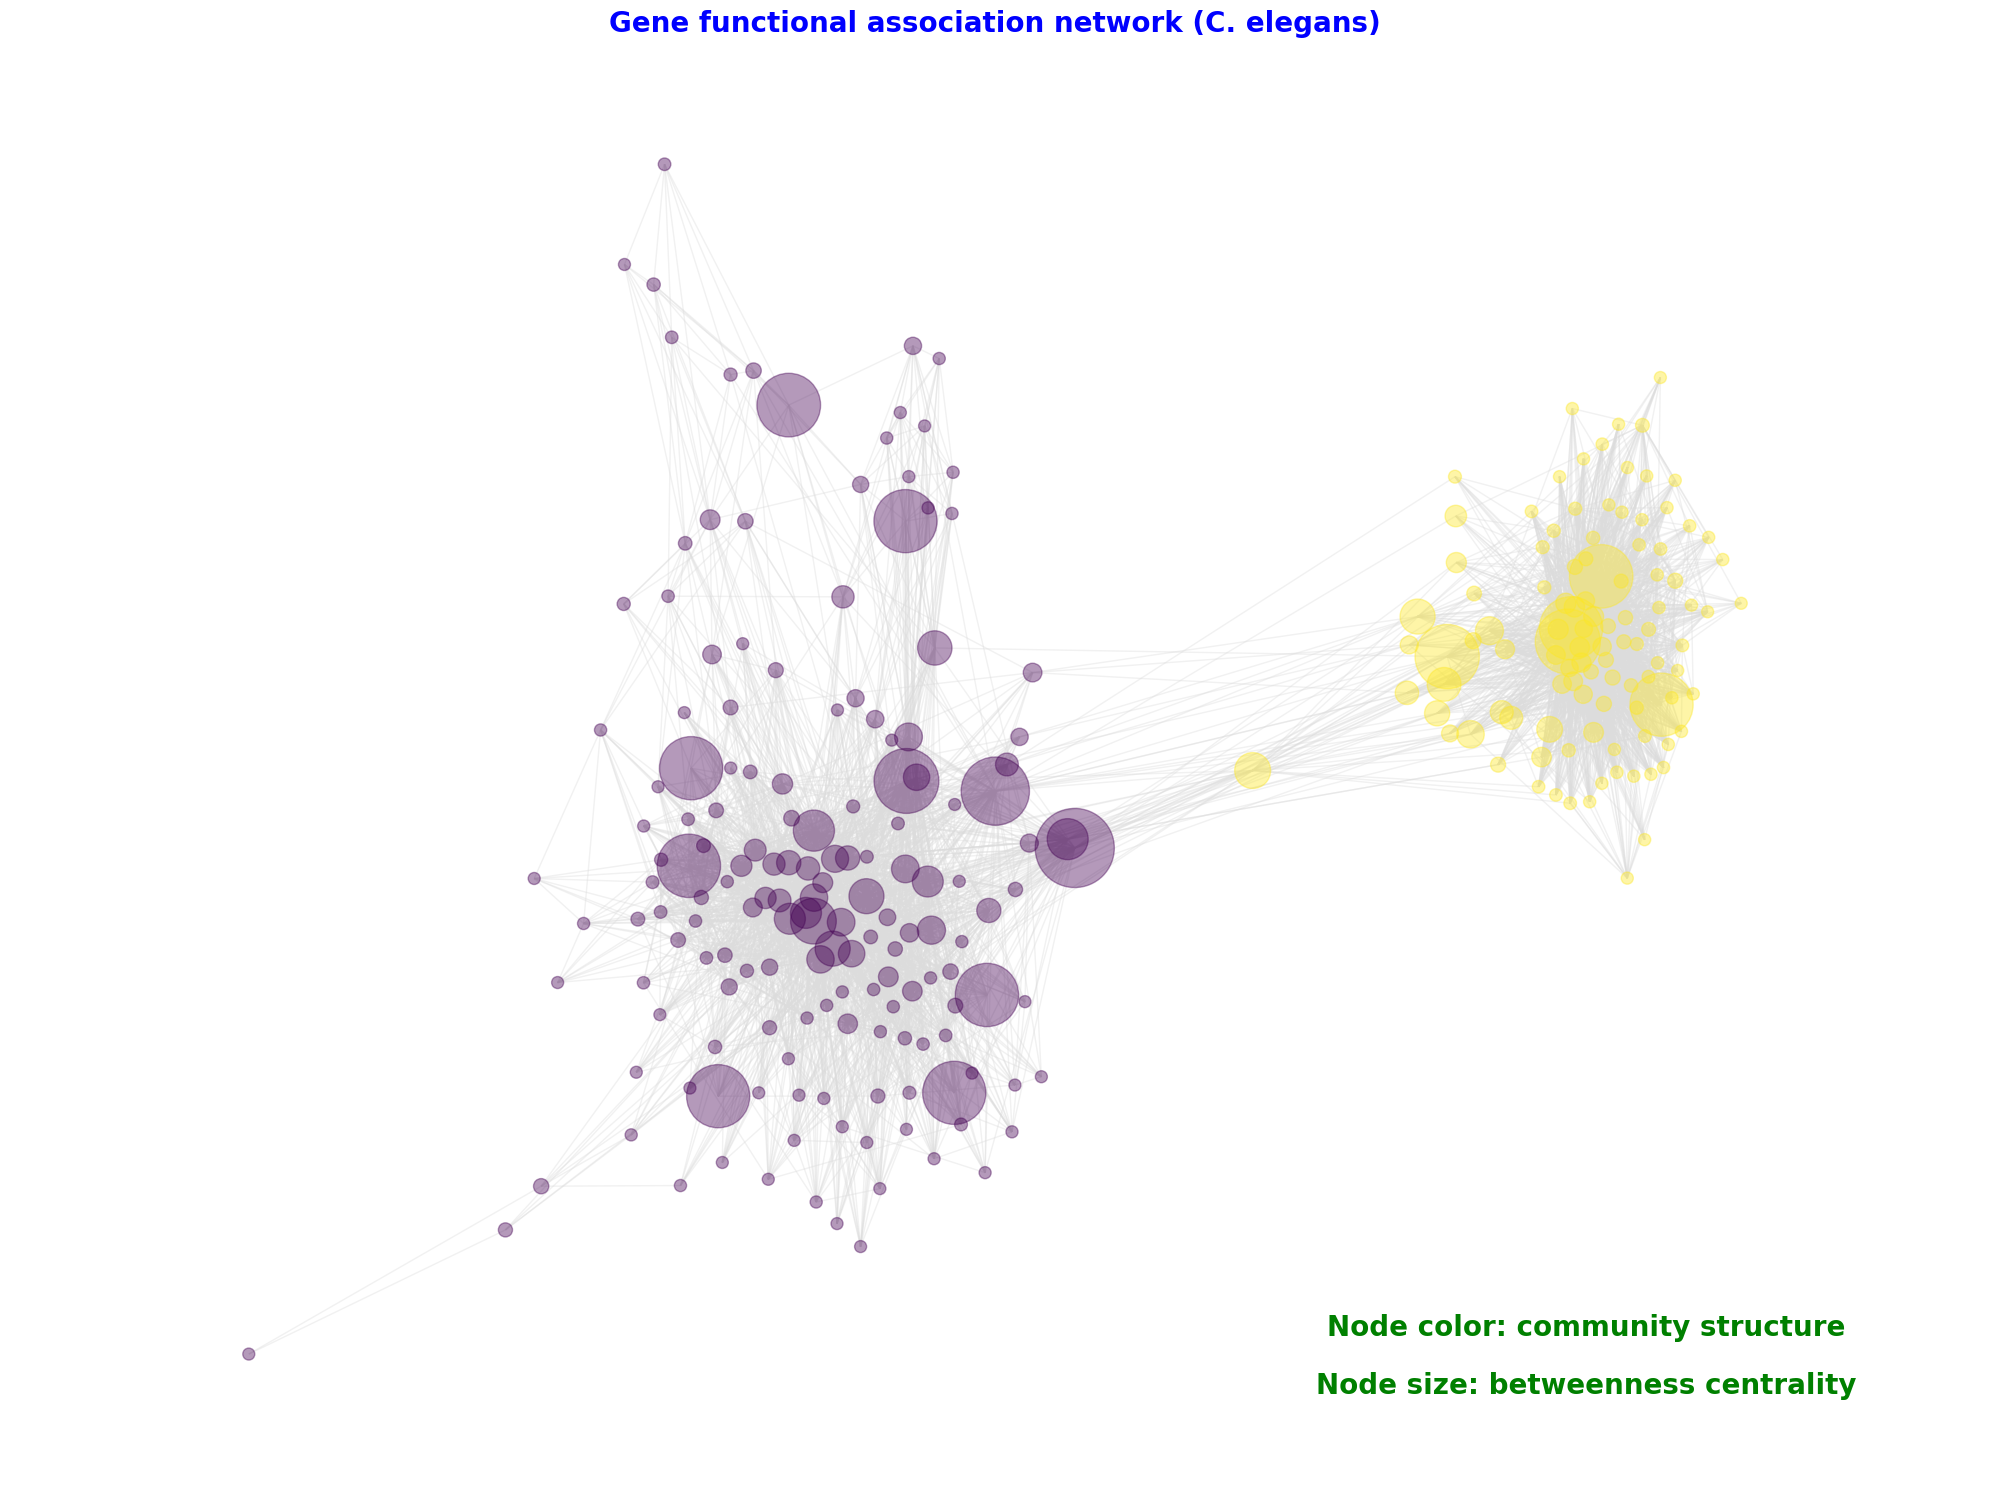

In [54]:
# Remove low-degree nodes
def remove_low_degree_nodes(G):
    low_degree = [n for n, d in G.degree() if d < 10]
    G.remove_nodes_from(low_degree)
    return G
    
G1 = remove_low_degree_nodes(G1)
largest_component = get_largest_component(G1)
pos = nx.spring_layout(largest_component, k=0.15)
draw_graph_betweenness_centrality(G1, largest_component, 10, pos)

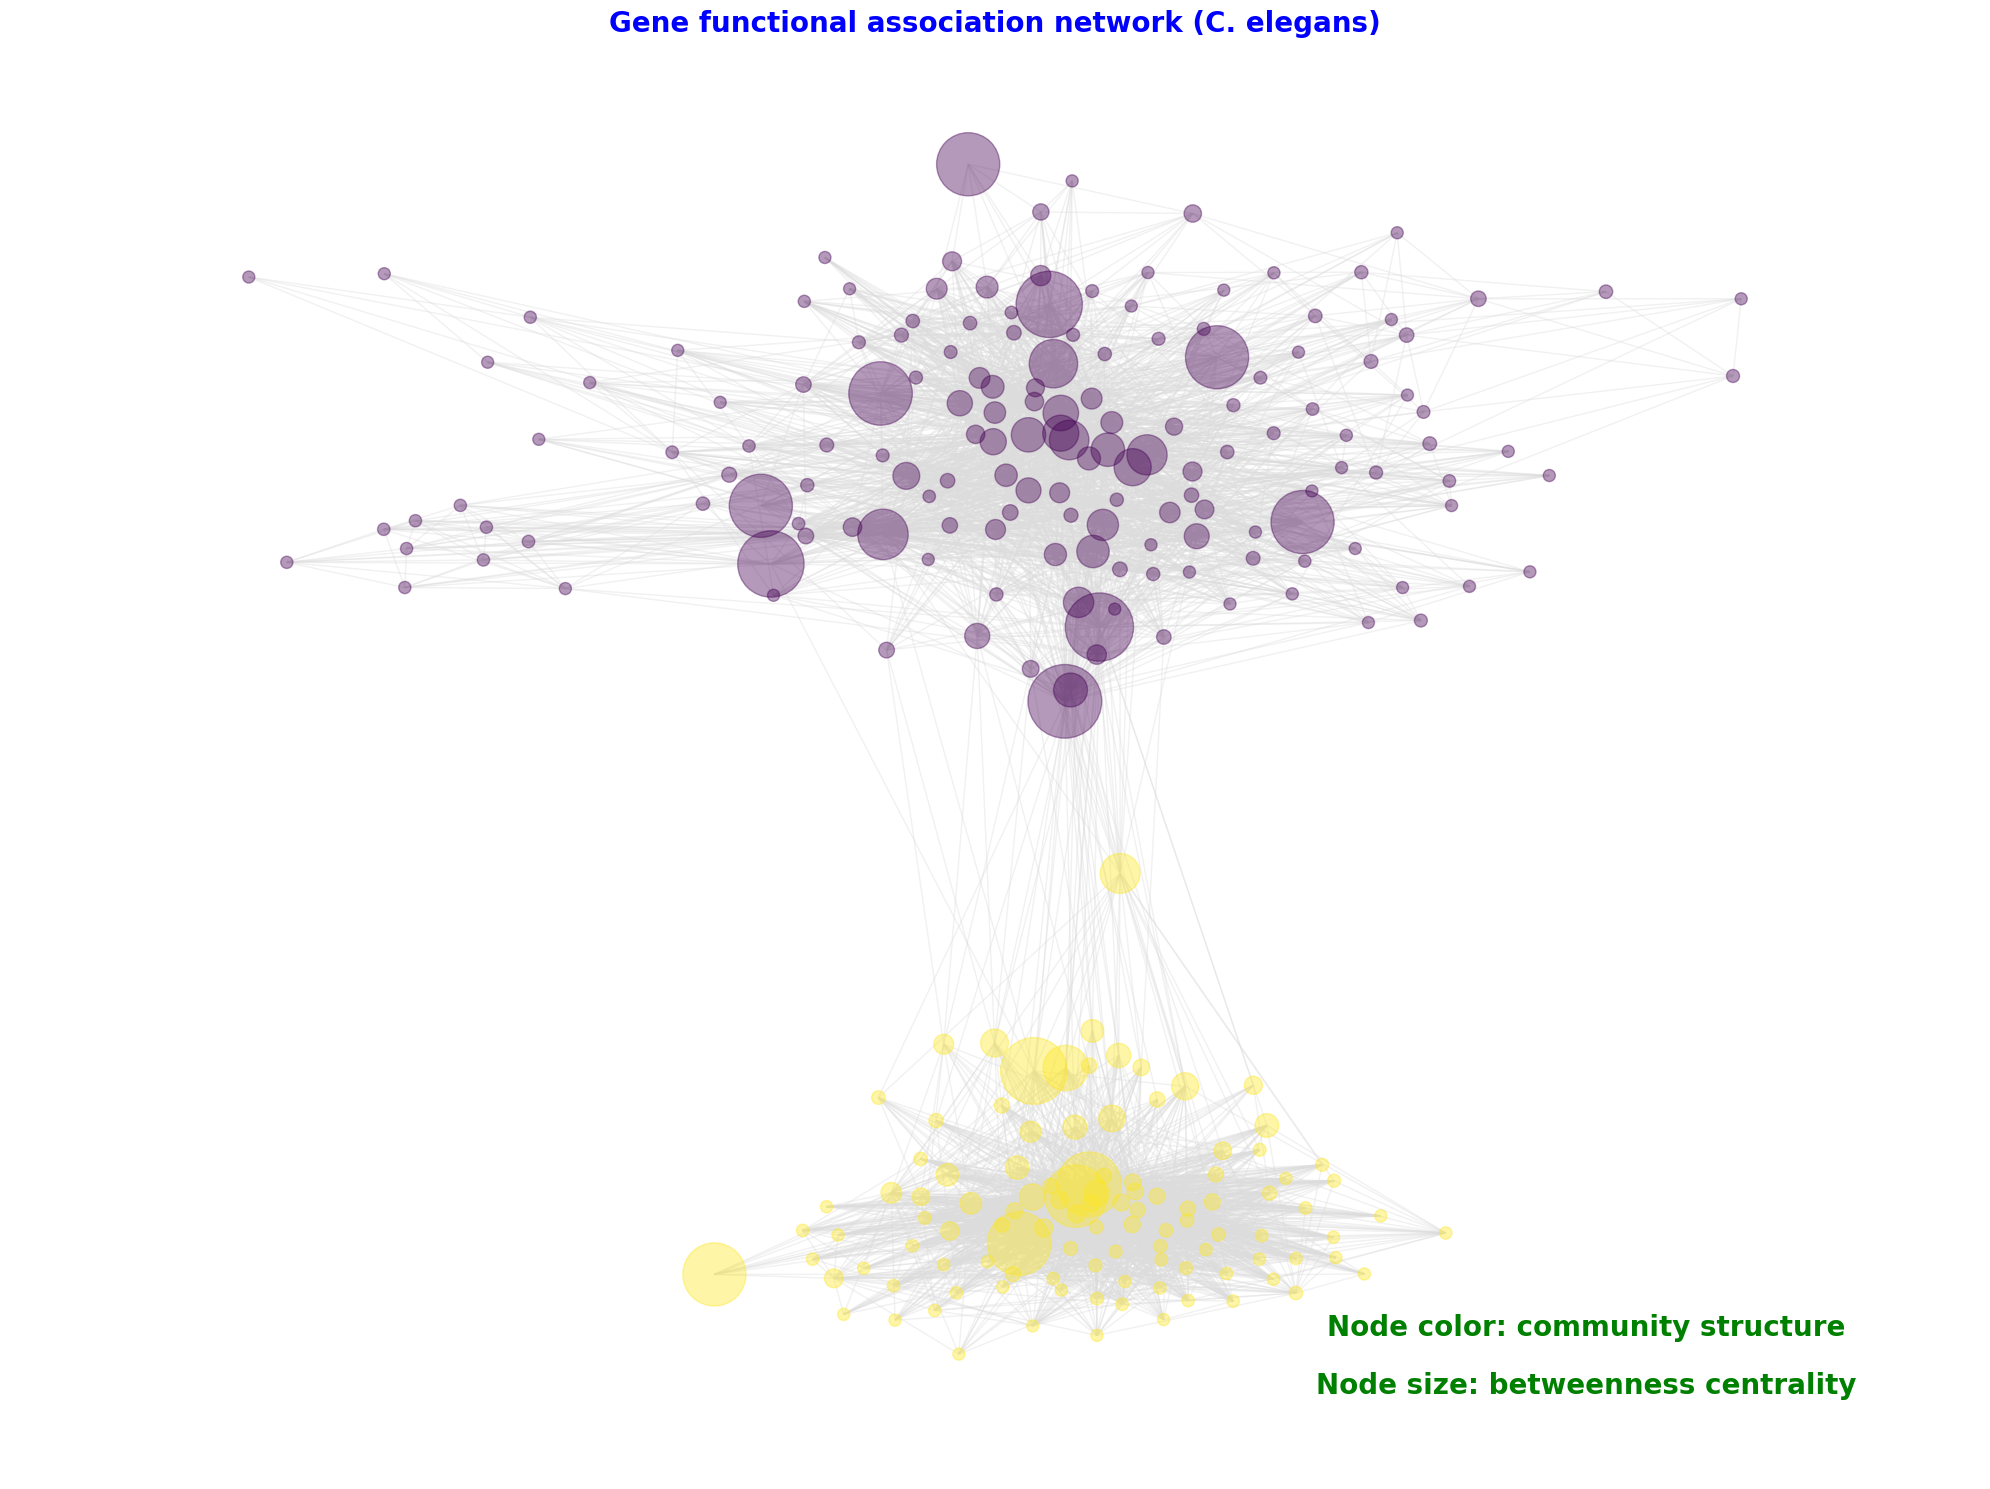

In [55]:
def remove_low_closeness_nodes(G):
    closeness_centralities = nx.closeness_centrality(G)
    threshold = 0.3    
    low_closeness_nodes = [node for node, closeness in closeness_centralities.items() if closeness < threshold]
    G.remove_nodes_from(low_closeness_nodes)
    return G

G2 = remove_low_closeness_nodes(G)
largest_component = get_largest_component(G2)
pos = nx.spring_layout(largest_component, k=0.15)
draw_graph_betweenness_centrality(G2, largest_component, 10, pos)

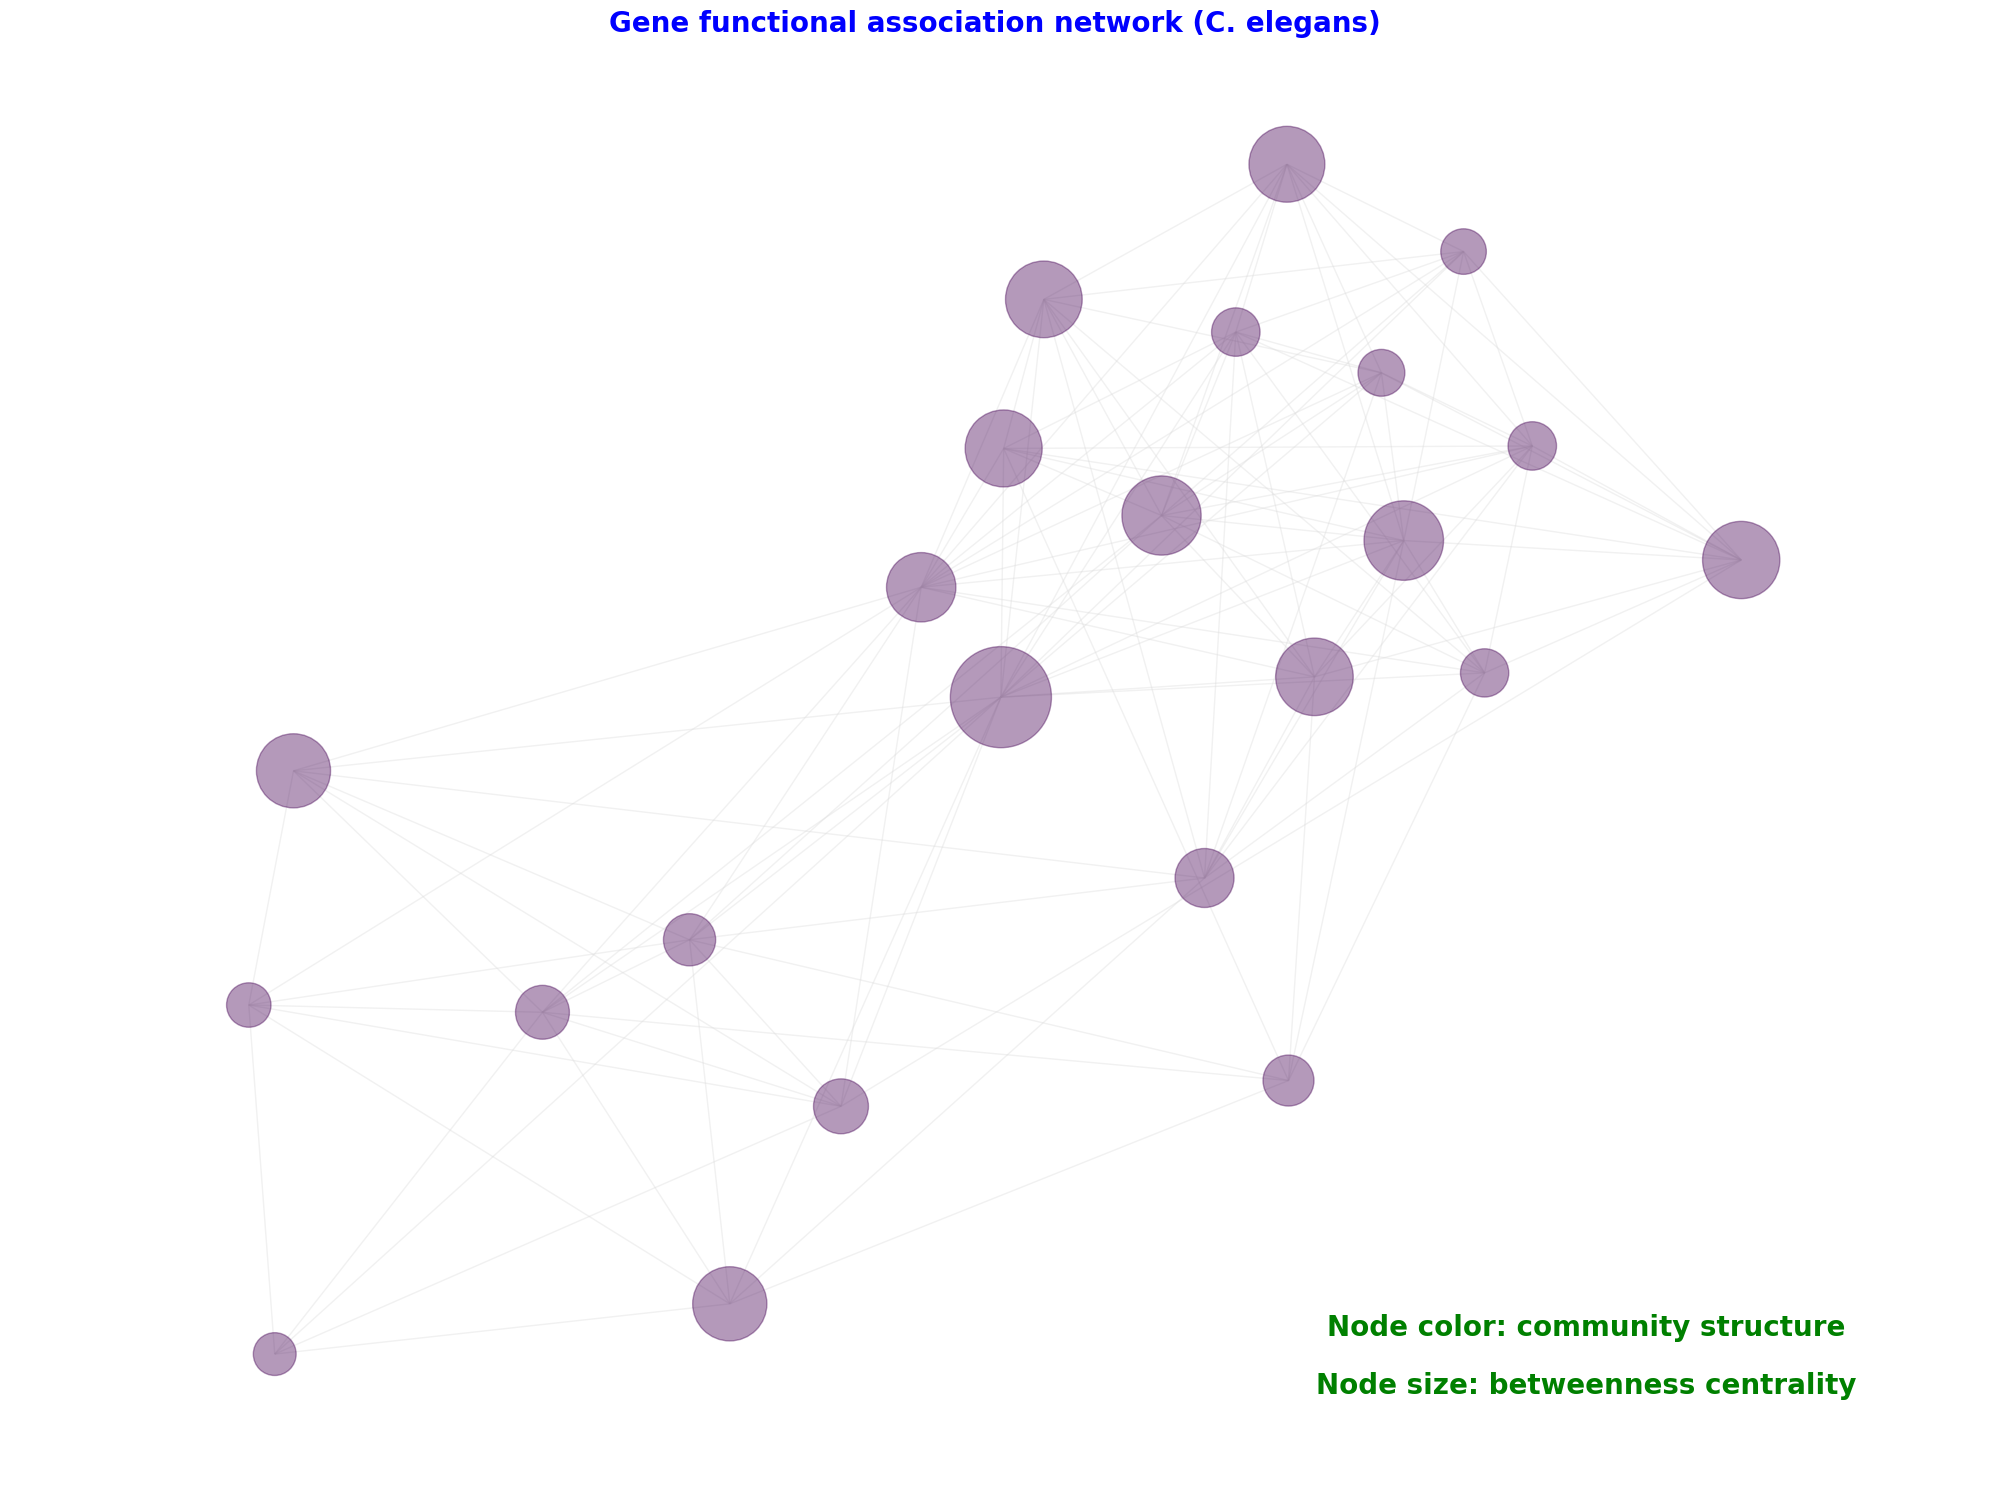

In [56]:
def remove_low_katz_nodes(G):
    katz_centralities  = nx.katz_centrality_numpy(G)
    threshold = 0.1
    low_katz_nodes = [node for node, centrality in katz_centralities.items() if centrality < threshold]
    G.remove_nodes_from(low_katz_nodes)
    return G

G3 = remove_low_katz_nodes(G)
largest_component = get_largest_component(G3)
pos = nx.spring_layout(largest_component, k=0.15)
draw_graph_betweenness_centrality(G, largest_component, 10, pos)

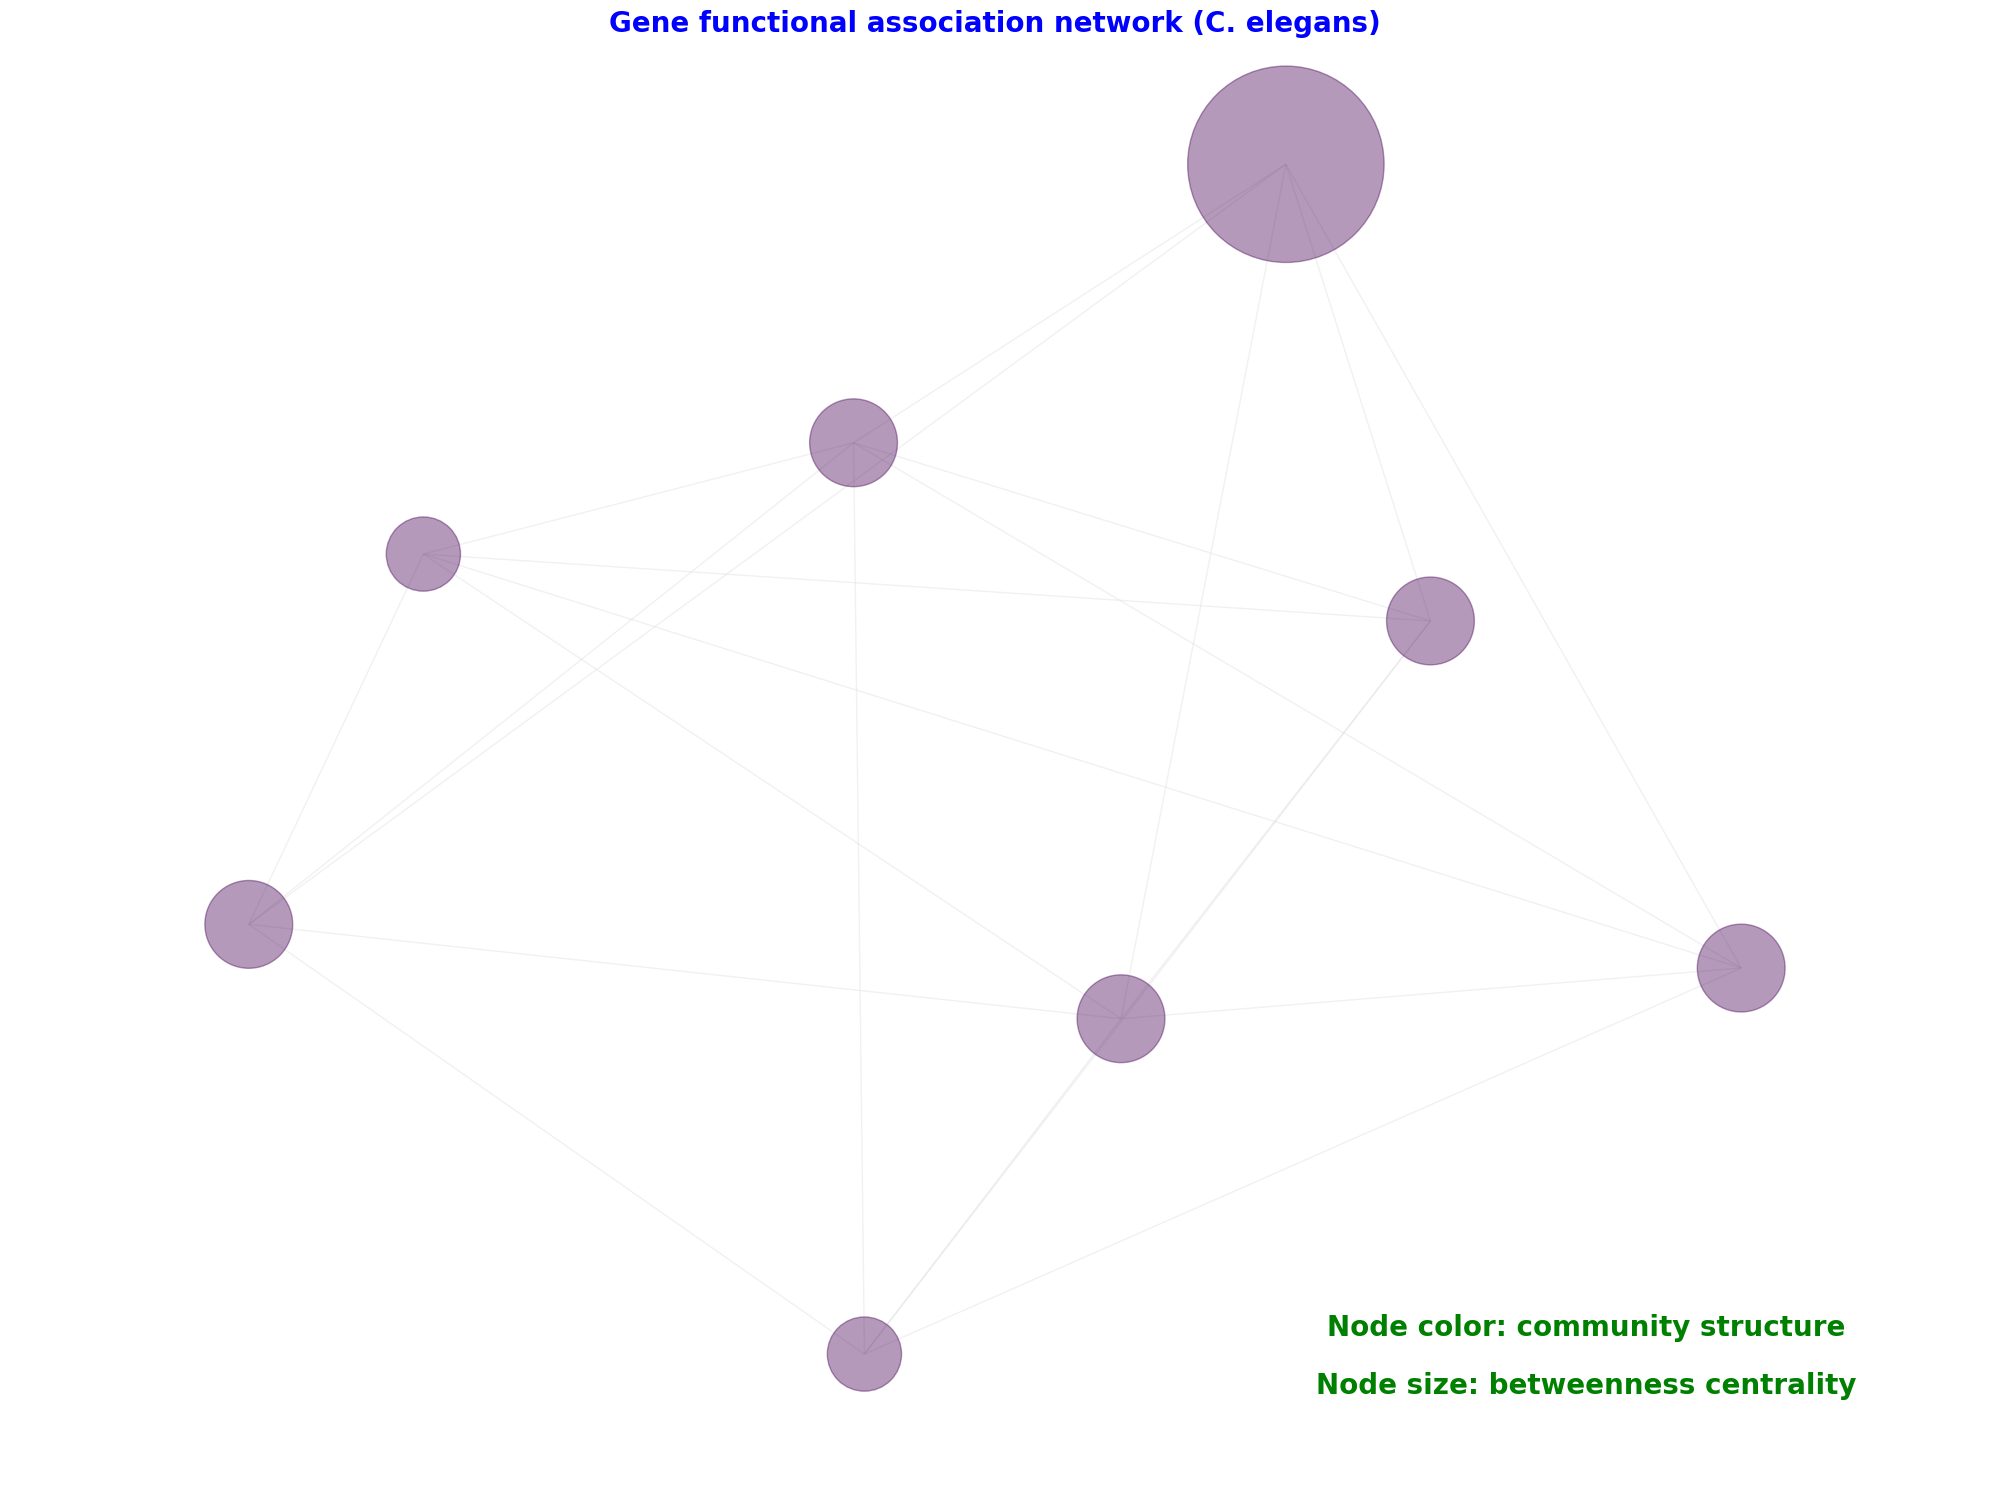

In [57]:
def remove_low_pagerank_nodes(G):
    pagerank_centralities = nx.pagerank(G)
    threshold = 0.05    
    low_pagerank_nodes = [node for node, pagerank in pagerank_centralities.items() if pagerank < threshold]
    G.remove_nodes_from(low_pagerank_nodes)
    return G

G4 = remove_low_pagerank_nodes(G)
largest_component = get_largest_component(G)
pos = nx.spring_layout(largest_component, k=0.15)
draw_graph_betweenness_centrality(G, largest_component, 1, pos)

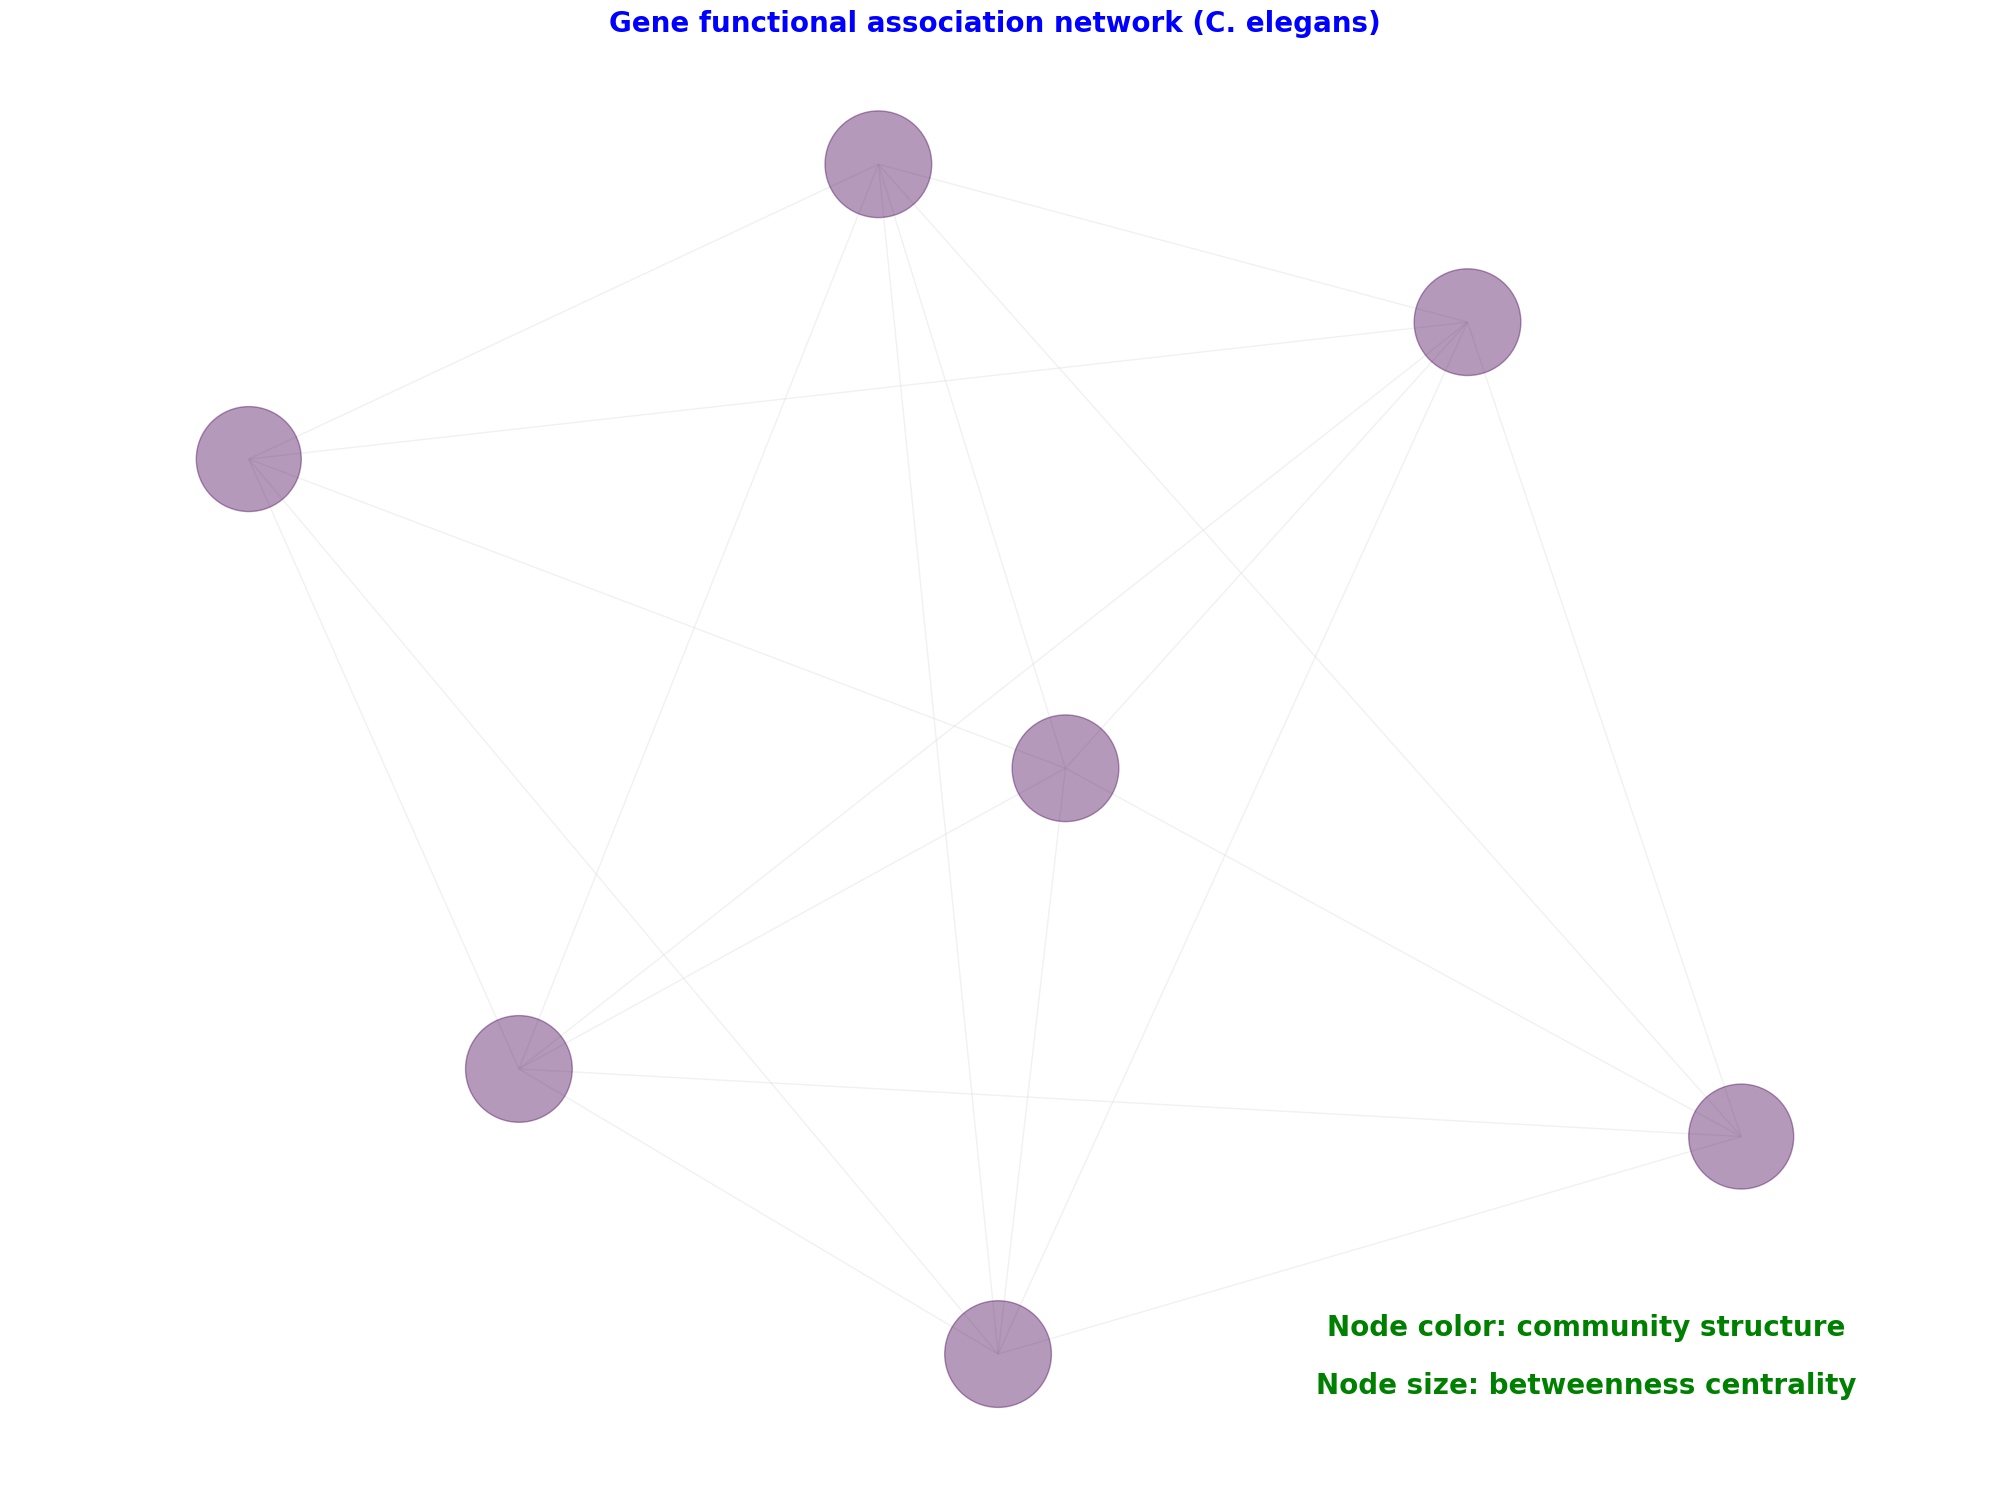

In [60]:
def remove_low_eigenvector_nodes(G):
    eigenvector_centralities = nx.eigenvector_centrality_numpy(G)
    threshold = 0.1
    low_eigen_nodes = [node for node, eigen in eigenvector_centralities.items() if eigen < threshold]
    G.remove_nodes_from(low_eigen_nodes)
    return G

# Read graph data from edgelist
G = nx.read_weighted_edgelist("data/CE-PG.txt")
G5 = remove_low_eigenvector_nodes(G)
largest_component = get_largest_component(G)
pos = nx.spring_layout(largest_component, k=0.15)
draw_graph_betweenness_centrality(G5, largest_component, 7, pos)

# 4. Complete the following requirements:
### 4.1. Load graph from edge-list file [data/WormNet.v3.benchmark.txt](https://github.com/NSLab-CUK/Graph-Mining-Spring-2024/tree/main/W3/data/WormNet.v3.benchmark.txt)
### 4.2. Then, you store this graph in a gexf file.
### 4.3. Finally, you load this file in Gephi and compute Centrality methods to visualize your graph and save figures for them. Visualizing your graph in circular and spring layouts combining with these methods:
+ Betweenness Centrality
+ Degree
+ Eigen Centrality
### 4.4. In Gephi, compute the statistic betweenness, centrality. Then, print as a pdf.

In [16]:
# Read graph data from edgelist
G = nx.read_edgelist("data/WormNet.v3.benchmark.txt")
# Store in a gexf file
nx.write_gexf(G, "data/WormNet.gexf")

### Load file in gephi and save figures
Check the results in this folder: [Gephi](https://github.com/NSLab-CUK/Graph-Mining-Spring-2024/tree/main/W3/gephi/)